# 作業：使用 Flask 操作 Mongo

# [作業目標]
* 能夠使用 python 操作 mongodb 的增刪改查。
* API 設計上能符合 Restful 風格。

# [作業重點]
* 能使用正確的 Http Method 去接收 Request。
* 實作之前，Mongo Server 要記得開啟。
* 若 DB 和 Collection 原本不存在，請先用 Robo3T 手動建立。

# [本作業你可能需要使用的 packages]
* from pymongo import MongoClient
* from flask import Flask, request
* from bson.objectid import ObjectId

In [1]:
from pymongo import MongoClient

In [2]:
client = MongoClient(host='127.0.0.1', port = 27017)

In [3]:
db = client['aiot']
collection = db['member']
collection

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'aiot'), 'member')

In [4]:
data_list = [
    {'name':'Chin-yu','phone':'0928778120','email':'chin_yu@gmail.com'},
    {'name':'Mimi','phone':'0904131313','email':'mimi@gmail.com'},
    {'name':'deeyo','phone':'0955944431','email':'deeyo@gmail.com'}
]

In [5]:
result = collection.insert_many(data_list)
result

In [6]:
from flask import Flask,request,jsonify
from flask_pymongo import PyMongo
from bson.objectid import ObjectId

app = Flask(__name__)
app.config['MONGO_URI'] = "mongodb://localhost:27017/aiot"  #資料庫address
mongo = PyMongo(app)

#取得會員資料
@app.route("/members")
@app.route("/members/<id>",methods = ['GET'])
#使用 Flask 操作 MongoDB - 取得GET
def get_member(id = None):
    #如果沒有id，取得所有會員資料
    if id is None:
        members = mongo.db.member.find({})
        result = []
        for m in members:
            m['_id'] = str(m['_id'])
            result.append(m)
        return jsonify(result)
    else:
        result = mongo.db.member.find_one({'_id':ObjectId(id)})
        if result is not None:
            result['_id'] = str(result['_id']) #回傳id為ObjectId型別轉換str
        return jsonify(result)

#使用 Flask 操作 MongoDB - 新增POST一筆資料  
@app.route('/members', methods = ['POST'])
def add_member():
    name = request.form.get('name')
    phone = request.form.get('phone')
    email = request.form.get('email')
    result = mongo.db.member.insert_one({'name':name, 'phone':phone, 'email':email})
    return str(result.inserted_id)

#使用 Flask 操作 MongoDB - 刪除DELETE一筆資料
@app.route('/members/<id>', methods = ['DELETE'])
def remove_member(id):
    #先確認db內是否有資料
    m = mongo.db.member.find({'_id':ObjectId(id)})
    if m is not None:
        result = mongo.db.member.delete_one({'_id':ObjectId(id)})
    return 'The number of deleted data:' + str(result.deleted_count)

#使用 Flask 操作 MongoDB - 修改PUT一筆資料
@app.route("/members/<id>", methods = ['PUT'])
def update_member(id):
    result = 0
    #從form裡面取出資料
    name = request.form.get('name')
    phone = request.form.get('phone')
    email = request.form.get('email')
    #把新的資料用 dict 型別包裝
    new_data = {"$set":{"name":name, "phone":phone, "email":email}}
    #用update_one更新一筆資料，若要更新多筆可用update_many
    upd_result=mongo.db.member.update_one({"_id": ObjectId(id)}, new_data)
    if upd_result is not None:
        return 'The number of updated data:' + str(upd_result.modified_count)
    
if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


# 作業 1
* 使用 Post，傳入參數 name, age, email 參數，並把資料存入 Member Collection。


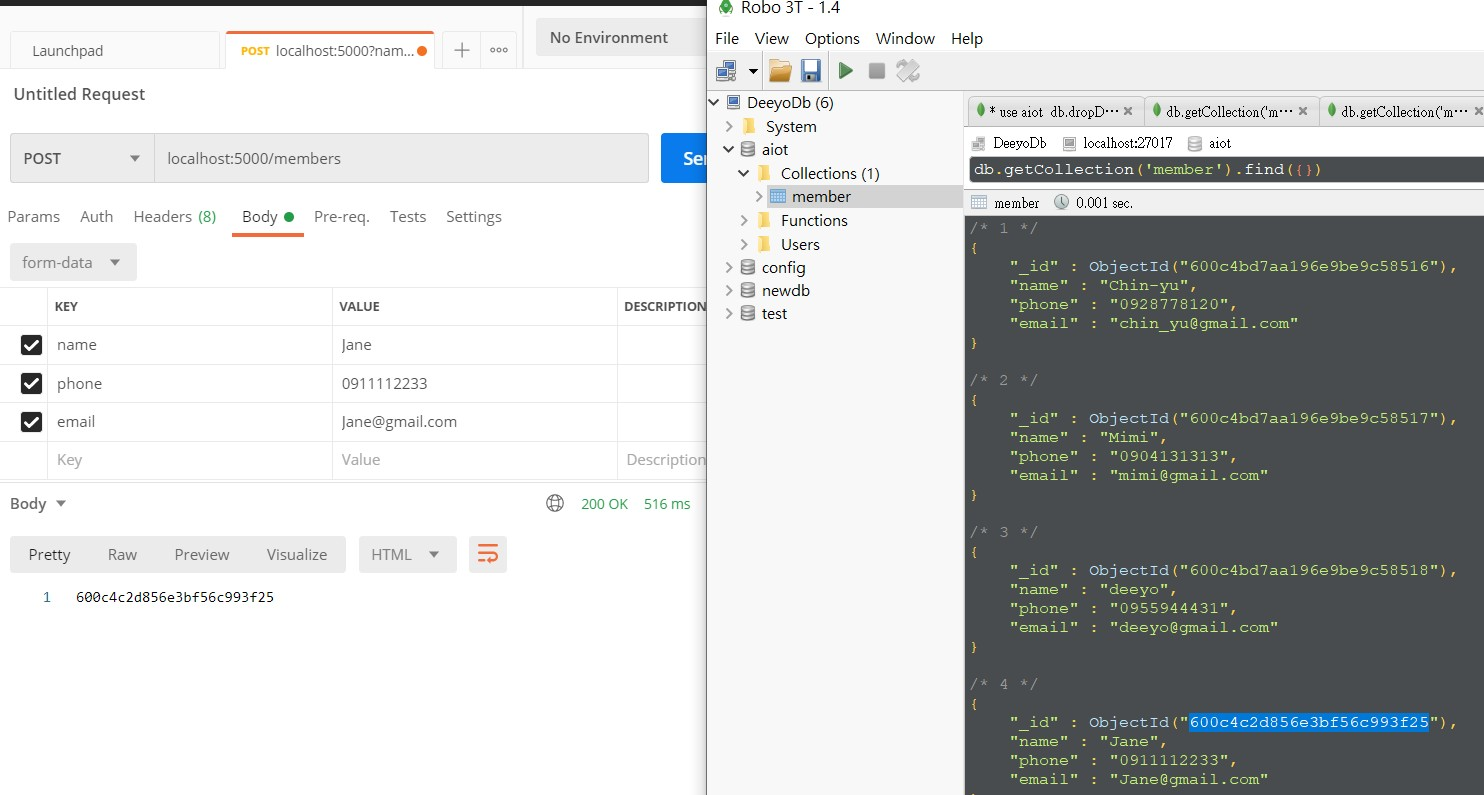

In [7]:
from IPython.display import Image
Image(filename="18.jpg")

# 作業 2
* 使用 Get，取得所有的資料。
* 使用 Get，帶入要取得的資料 id 參數，並成功從 Mongo 中取得某一筆特定資料。

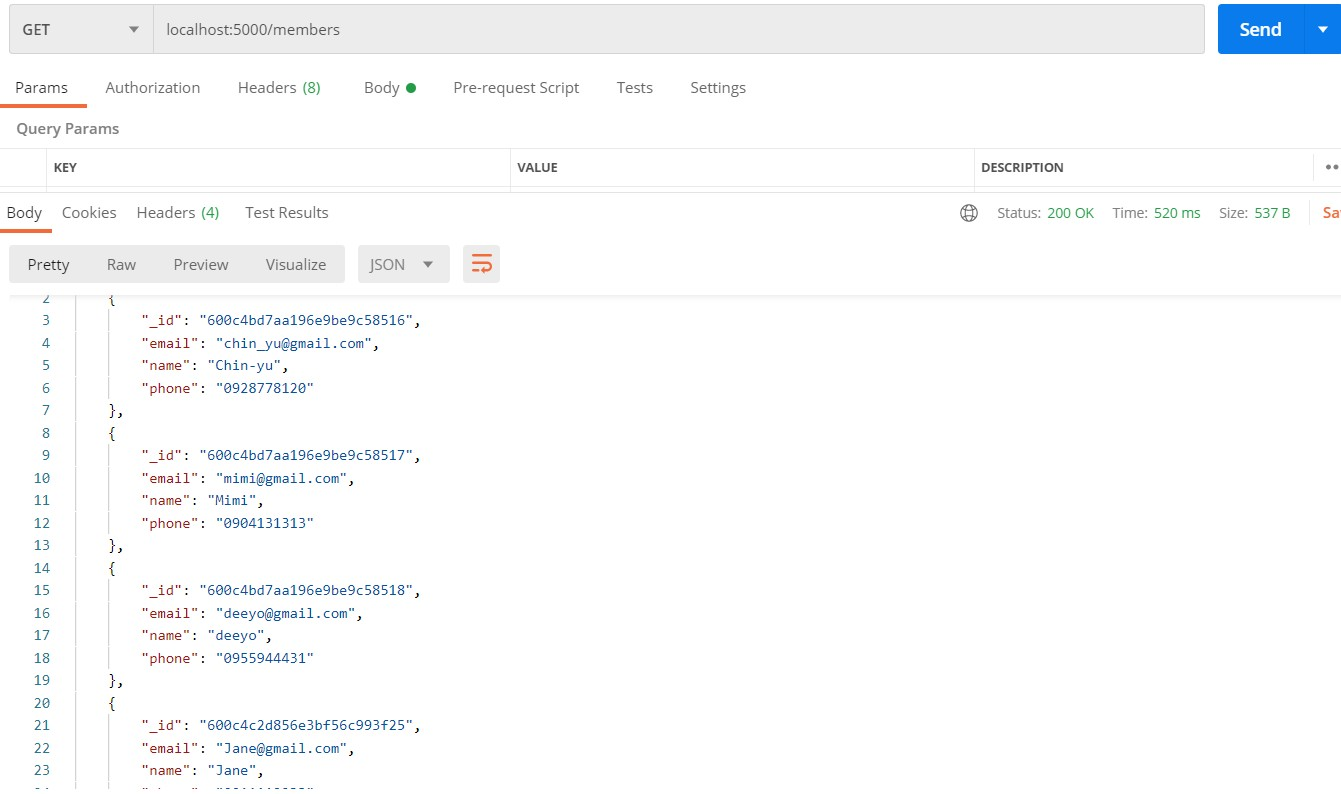

In [8]:
from IPython.display import Image
Image(filename="19.jpg")

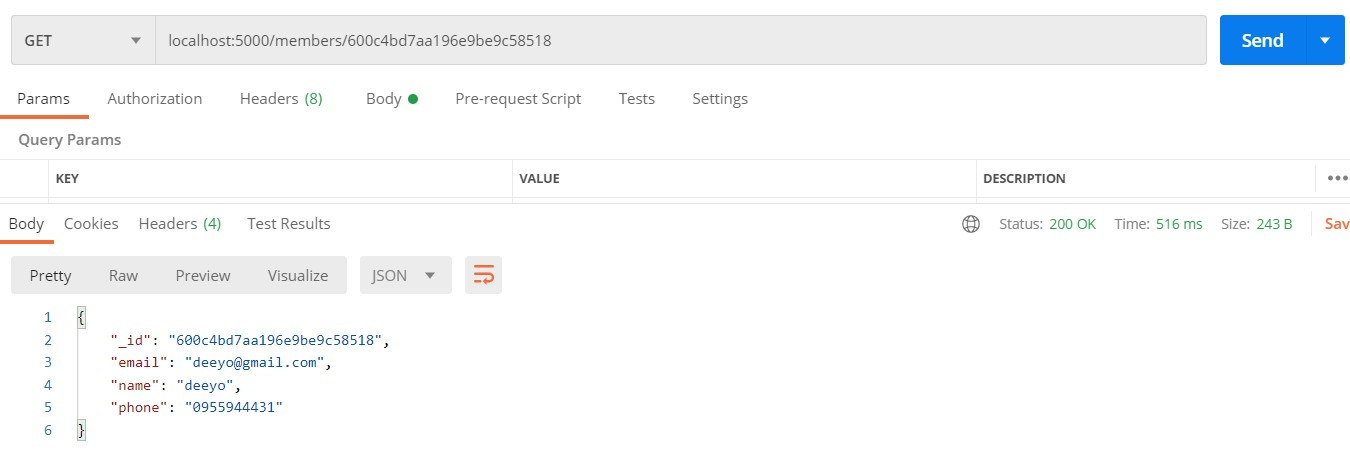

In [9]:
from IPython.display import Image
Image(filename="20.jpg")

# 作業 3
* 使用 PUT，帶入要更新的資料id，並傳入 name, age, email 參數，並修改 Mongo 中某一筆資料的值。

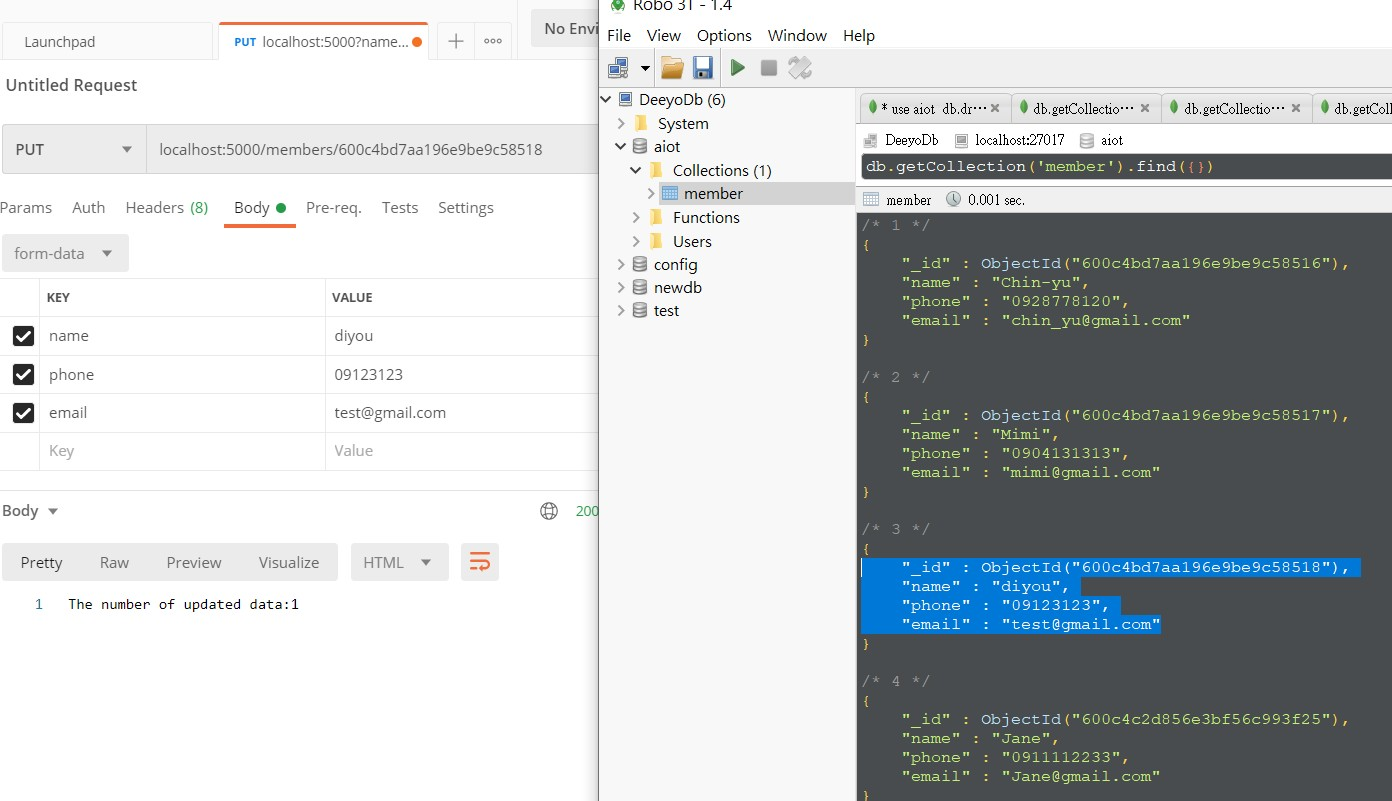

In [10]:
from IPython.display import Image
Image(filename="21.jpg")

# 作業 4
* 使用 DELETE，帶入要刪除的資料 id，並刪除 Mongo 中某一筆資料。

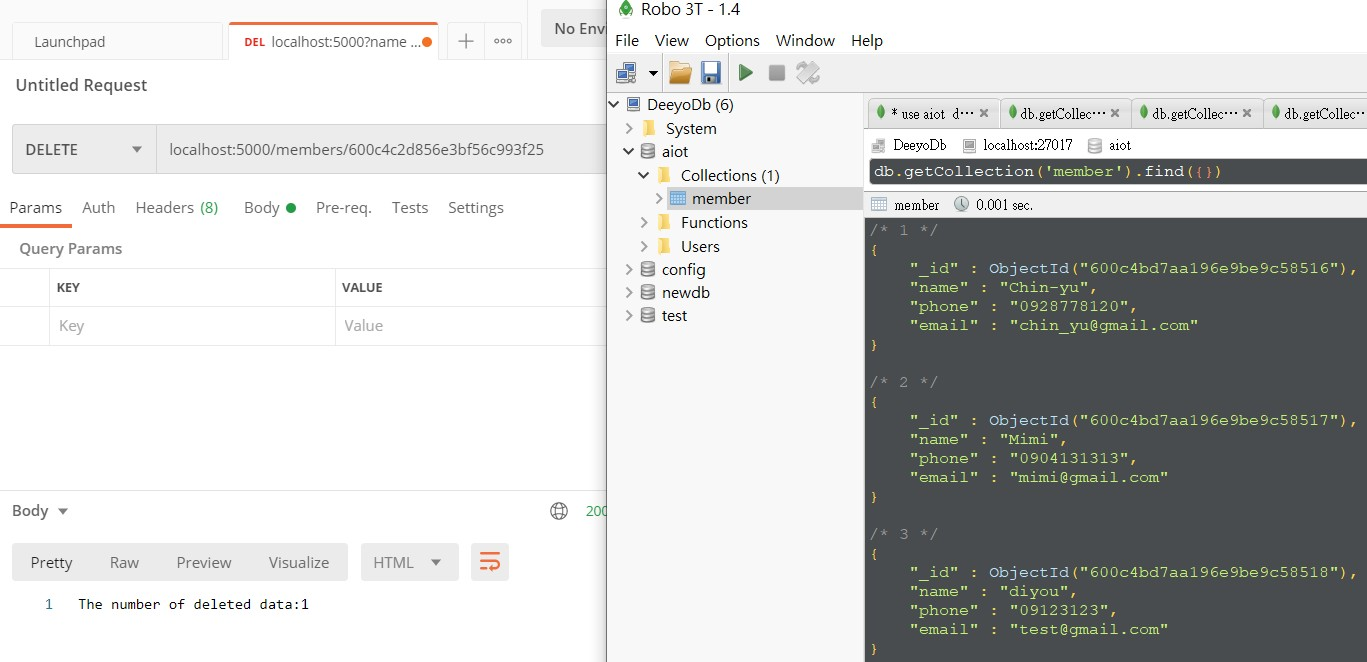

In [11]:
from IPython.display import Image
Image(filename="22.jpg")